# Protocol 3

In [4]:
import util
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import colors

def get_models_epochs(file_dict):
    row = []
    for alias, file_path in file_dict.items():
        folder = str(file_path).split('/')[:-1]
        ckp1 = '/'.join(folder)+'/'+folder[-1]+'_best.pth'
        if alias == "$S_2$":
            ckp2 = '/'.join(folder)+'/'+folder[-1]+'_119.pth'
        else:
            ckp2 = '/'.join(folder)+'/'+folder[-1]+'_curr.pth'
        epoch1 = util.get_checkpoint_epoch(ckp1)
        epoch2 = util.get_checkpoint_epoch(ckp2)
        row.append((alias, epoch1, epoch2))
    return pd.DataFrame(row, columns =['Name', 'best', 'curr'])

In [5]:
util.dataset_info('data/p3')

,split,classes,size,kn size,kn (%),kn_unk size,kn_unk (%),unk_unk size,unk_unk (%)
0,train,153,255022,156247,61.3%,98775,38.7%,0,0.0%
1,val,153,63764,39066,61.3%,24698,38.7%,0,0.0%
2,test,154,20600,7600,36.9%,4850,23.5%,8150,39.6%


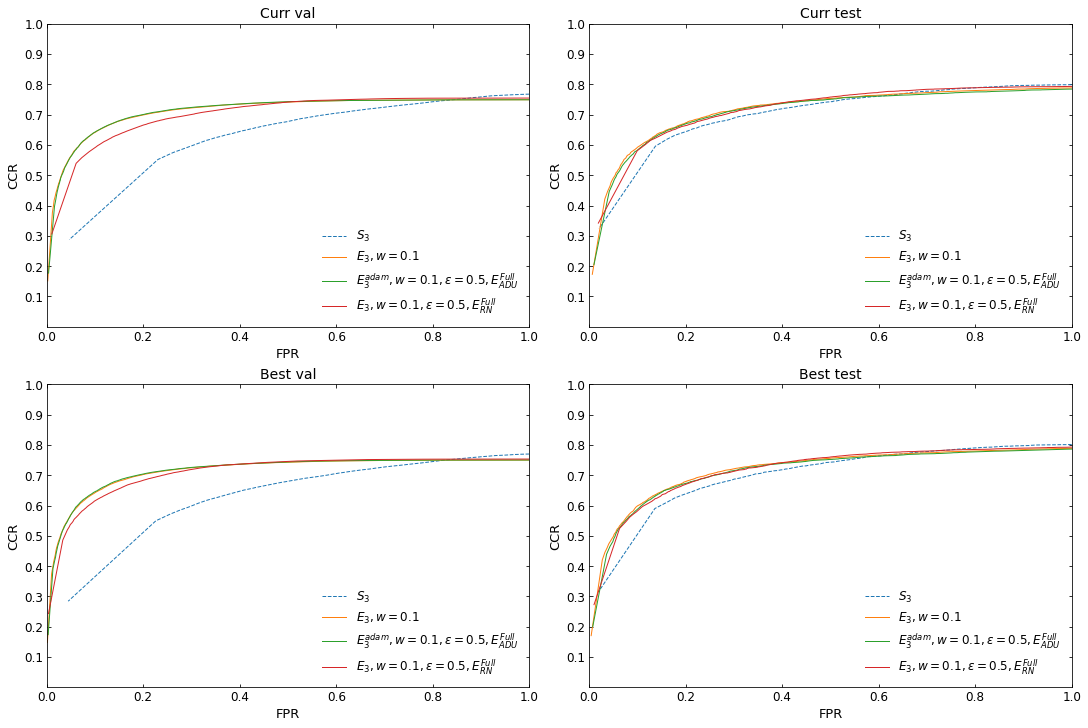

In [5]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
out_dir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/outputs')

p3_files = {
    # Baseline'
    '$S_3$': out_dir/'s3n_l1_e0_adam_d40_g0.3/s3n_l1_e0_adam_d40_g0.3_curr_val_arr.npz',
    '$E_3, w=0.1$': out_dir/'e3n_w0.1_l1_e0_adam_d40_g0.3/e3n_w0.1_l1_e0_adam_d40_g0.3_curr_val_arr.npz',
    # '$O_3^{adam}, w=0.1, a=0.01, d=40$': out_dir/'o3n_a0.01_w0.1_l1_e0_adam_d40_g0.3/o3n_a0.01_w0.1_l1_e0_adam_d40_g0.3_curr_val_arr.npz',

    # Finetune softmax with entropic adversarials FSA
    # '$E_3, w=0.1, \epsilon=0.5, d=40, l=1,  S_{AD}^{Full}$': out_dir/'e3n_w0.1_l1_e5_adam_d40_g0.3_full_FSA/e3n_w0.1_l1_e5_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_3, w=0.1, \epsilon=0.5, d=30, l=0.1,S_{AD}^{Full}$': out_dir/'e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FSA/e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FSA_curr_val_arr.npz',
    # '$E_3, w=0.1, \epsilon=0.1, d=30, l=1,  S_{AD}^{Filter}$': out_dir/'e3n_w0.1_l1_e1_adam_d30_g0.1_filter_ep40_FSA/e3n_w0.1_l1_e1_adam_d30_g0.1_filter_ep40_FSA_curr_val_arr.npz',
    # '$E_3^{sgd}, w=0.1, \epsilon=0.2, l=0.1,  S_{AD}^{Filter}$': out_dir/'e3n_w1_l0.1_e2_sgd_filter_ep40_FSA/e3n_w1_l0.1_e2_sgd_filter_ep40_FSA_curr_val_arr.npz',
    #sgd ep=0.2
    
    # Finetune entropic with adversarials FEA
    # '$E_3, w=0.1, \epsilon=0.5, E_{AD}^{Full}$': out_dir/'e3n_w0.1_l1_e5_adam_d40_g0.3_full_FEA/e3n_w0.1_l1_e5_adam_d40_g0.3_full_FEA_curr_val_arr.npz',
    # '$E_3, w=1, \epsilon=0.5, E_{AD}^{Full}$': out_dir/'e3n_w1_l1_e5_adam_d40_g0.3_full_FEA/e3n_w1_l1_e5_adam_d40_g0.3_full_FEA_curr_val.npz',
   
    # Finetune entropic with entropic adversarials and uknowns
    '$E_3^{adam}, w=0.1, \epsilon=0.5, E_{ADU}^{Full}$': out_dir/'e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FEAU/e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FEAU_curr_val_arr.npz',
    # '$E_3^{adam}, w=0.1, \epsilon=0.1, E_{ADU}^{Filter}$': out_dir/'e3n_w0.1_l1_e1_adam_d30_g0.1_filter_ep40_FEAU/e3n_w0.1_l1_e1_adam_d30_g0.1_filter_ep40_FEAU_curr_val_arr.npz',
    # '$E_3^{sgd}, w=0.1, \epsilon=0.07, E_{ADU}^{Filter}$': out_dir/'e3n_w0.1_l0.1_e0.7_sgd_filter_ep40_FEAU/e3n_w0.1_l0.1_e0.7_sgd_filter_ep40_FEAU_curr_val_arr.npz',
     
     
    # Finetune entropic with random noise
    '$E_3, w=0.1, \epsilon=0.5, E_{RN}^{Full}$': out_dir/'e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FERN/e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FERN_curr_val_arr.npz',
    # '$E_3{old}, w=1$':      hdir/'e3_a0_w1_l1_t8_x0_e0_af/e3_a0_w1_l1_t8_x0_e0_af_best_val_arr.npz',
    # '$E_3^{best}, w=1$':    hdir/'e3n_a0.01_w1_l1_t5_x0_e0_af/e3n_a0.01_w1_l1_t5_x0_e0_af_best_val_arr.npz',
    # '$E_{3old}^{curr}, w=1$':    hdir/'e3n_a0.01_w1_l1_t5_x0_e0_af/e3n_a0.01_w1_l1_t5_x0_e0_af_curr_val_arr.npz',
    
    # '$o_{3old}, w=1, a=1$':        hdir/'o3_a1_w1_l1_t8_x10_e0_af/o3_a1_w1_l1_t8_x10_e0_af_curr_val_arr.npz',
    # '$o_{3old}, w=1, a=1, e=0.5$': hdir/'o3_a1_w1_l1_t8_x10_e5_at/o3_a1_w1_l1_t8_x10_e5_at_curr_val_arr.npz',
    # '$O_3^{curr}, w=0.1, a=0.01$':          hdir/'o3n_a0.01_w0.1_l1_t5_x10_e0_af/o3n_a0.01_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
    
    # Finetune objectosphere with adversarials
    # '$O_3^{adam}, w=0.1, a=0.1, \epsilon=0.5, O_{AD}^{Full}$': out_dir/'o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FOA/o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FOA_curr_val_arr.npz',
    # '$O_3^{sgd}, w=0.1, a=0.1, \epsilon=0.2, O_{AD}^{Full}$': out_dir/'o3n_a0.1_w0.1_l0.1_e2_sgd_d30_g1_full_ep40_FOA/o3n_a0.1_w0.1_l0.1_e2_sgd_d30_g1_full_ep40_FOA_curr_val_arr.npz',
    
    # Finetune objectosphere with adversarials and unknowns
    # '$O_3^{adam}, w=0.1, a=0.1, \epsilon=0.5, O_{ADU}^{full}$': out_dir/'o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FOAU/o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FOAU_curr_val_arr.npz',
    # '$O_3^{adam}, w=0.1, a=0.1, \epsilon=0.2, O_{ADU}^{full}$': out_dir/'o3n_a1_w0.1_l1_e2_adam_d30_g0.1_full_ep40_FOAU/o3n_a1_w0.1_l1_e2_adam_d30_g0.1_full_ep40_FOAU_curr_val_arr.npz',
    # '$O_3^{adam}, w=0.1, a=0.01, \epsilon=0.5, O_{ADU}^{Filter}$': out_dir/'o3n_a0.01_w0.1_l1_e5_adam_d30_g0.1_filter_ep40_FOAU/o3n_a0.01_w0.1_l1_e5_adam_d30_g0.1_filter_ep40_FOAU_curr_val_arr.npz',
    # Fine tune objectosphere with objectosphere random noise
    # '$O_3^{adam}, w=0.1, a=0.1, \epsilon=0.5, O_{RN}^{full}$': out_dir/'o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FORN/o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FORN_curr_val_arr.npz',
}

arrays_curr = util.read_array_list(p3_files)
arrays_test_curr = util.read_array_list(util.transform_to_test(p3_files))

arrays_best = util.read_array_list(util.get_best_arrays(p3_files))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p3_files)))

fig, ax = plt.subplots(2,2, figsize=(15,10), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_curr, split='val', scale='linear', use_norms=False, base_line=True,
               title='Curr val', linewidth=1, ax_label_font=13, ax=axs[0])
util.plot_oscr(arrays_test_curr, split='test', scale='linear', use_norms=False, base_line=True,
               title='Curr test', linewidth=1, ax_label_font=13, ax=axs[1])
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Best val', linewidth=1, ax_label_font=13, ax=axs[2])
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Best test', linewidth=1, ax_label_font=13, ax=axs[3])

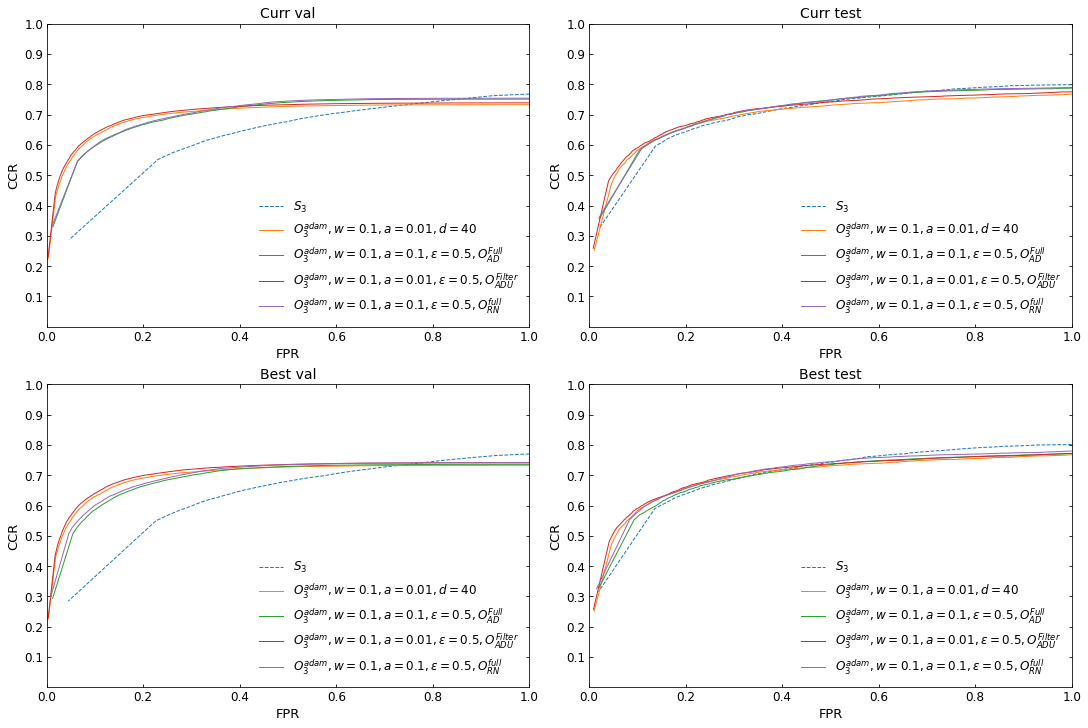

In [7]:
hdir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/runs')
out_dir = Path('/local/scratch/palechor/adversarialTraining/palechor_prod/outputs')

p3_files = {
    # Baseline'
    '$S_3$': out_dir/'s3n_l1_e0_adam_d40_g0.3/s3n_l1_e0_adam_d40_g0.3_curr_val_arr.npz',
    # '$E_3, w=0.1$': out_dir/'e3n_w0.1_l1_e0_adam_d40_g0.3/e3n_w0.1_l1_e0_adam_d40_g0.3_curr_val_arr.npz',
    '$O_3^{adam}, w=0.1, a=0.01, d=40$': out_dir/'o3n_a0.01_w0.1_l1_e0_adam_d40_g0.3/o3n_a0.01_w0.1_l1_e0_adam_d40_g0.3_curr_val_arr.npz',

    # Finetune softmax with entropic adversarials FSA
    # '$E_3, w=0.1, \epsilon=0.5, d=40, l=1,  S_{AD}^{Full}$': out_dir/'e3n_w0.1_l1_e5_adam_d40_g0.3_full_FSA/e3n_w0.1_l1_e5_adam_d40_g0.3_full_FSA_curr_val_arr.npz',
    # '$E_3, w=0.1, \epsilon=0.5, d=30, l=0.1,S_{AD}^{Full}$': out_dir/'e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FSA/e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FSA_curr_val_arr.npz',
    # '$E_3, w=0.1, \epsilon=0.1, d=30, l=1,  S_{AD}^{Filter}$': out_dir/'e3n_w0.1_l1_e1_adam_d30_g0.1_filter_ep40_FSA/e3n_w0.1_l1_e1_adam_d30_g0.1_filter_ep40_FSA_curr_val_arr.npz',
    # '$E_3^{sgd}, w=0.1, \epsilon=0.2, l=0.1,  S_{AD}^{Filter}$': out_dir/'e3n_w1_l0.1_e2_sgd_filter_ep40_FSA/e3n_w1_l0.1_e2_sgd_filter_ep40_FSA_curr_val_arr.npz',
    #sgd ep=0.2
    
    # Finetune entropic with adversarials FEA
    # '$E_3, w=0.1, \epsilon=0.5, E_{AD}^{Full}$': out_dir/'e3n_w0.1_l1_e5_adam_d40_g0.3_full_FEA/e3n_w0.1_l1_e5_adam_d40_g0.3_full_FEA_curr_val_arr.npz',
    # '$E_3, w=1, \epsilon=0.5, E_{AD}^{Full}$': out_dir/'e3n_w1_l1_e5_adam_d40_g0.3_full_FEA/e3n_w1_l1_e5_adam_d40_g0.3_full_FEA_curr_val.npz',
   
    # Finetune entropic with entropic adversarials and uknowns
    # '$E_3^{adam}, w=0.1, \epsilon=0.5, E_{ADU}^{Full}$': out_dir/'e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FEAU/e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FEAU_curr_val_arr.npz',
    # '$E_3^{adam}, w=0.1, \epsilon=0.1, E_{ADU}^{Filter}$': out_dir/'e3n_w0.1_l1_e1_adam_d30_g0.1_filter_ep40_FEAU/e3n_w0.1_l1_e1_adam_d30_g0.1_filter_ep40_FEAU_curr_val_arr.npz',
    # '$E_3^{sgd}, w=0.1, \epsilon=0.07, E_{ADU}^{Filter}$': out_dir/'e3n_w0.1_l0.1_e0.7_sgd_filter_ep40_FEAU/e3n_w0.1_l0.1_e0.7_sgd_filter_ep40_FEAU_curr_val_arr.npz',
     
     
    # Finetune entropic with random noise
    # '$E_3, w=0.1, \epsilon=0.5, E_{RN}^{Full}$': out_dir/'e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FERN/e3n_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FERN_curr_val_arr.npz',
    # '$E_3{old}, w=1$':      hdir/'e3_a0_w1_l1_t8_x0_e0_af/e3_a0_w1_l1_t8_x0_e0_af_best_val_arr.npz',
    # '$E_3^{best}, w=1$':    hdir/'e3n_a0.01_w1_l1_t5_x0_e0_af/e3n_a0.01_w1_l1_t5_x0_e0_af_best_val_arr.npz',
    # '$E_{3old}^{curr}, w=1$':    hdir/'e3n_a0.01_w1_l1_t5_x0_e0_af/e3n_a0.01_w1_l1_t5_x0_e0_af_curr_val_arr.npz',
    
    # '$o_{3old}, w=1, a=1$':        hdir/'o3_a1_w1_l1_t8_x10_e0_af/o3_a1_w1_l1_t8_x10_e0_af_curr_val_arr.npz',
    # '$o_{3old}, w=1, a=1, e=0.5$': hdir/'o3_a1_w1_l1_t8_x10_e5_at/o3_a1_w1_l1_t8_x10_e5_at_curr_val_arr.npz',
    # '$O_3^{curr}, w=0.1, a=0.01$':          hdir/'o3n_a0.01_w0.1_l1_t5_x10_e0_af/o3n_a0.01_w0.1_l1_t5_x10_e0_af_curr_val_arr.npz',
    
    # Finetune objectosphere with adversarials
    '$O_3^{adam}, w=0.1, a=0.1, \epsilon=0.5, O_{AD}^{Full}$': out_dir/'o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FOA/o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FOA_curr_val_arr.npz',
    # '$O_3^{sgd}, w=0.1, a=0.1, \epsilon=0.2, O_{AD}^{Full}$': out_dir/'o3n_a0.1_w0.1_l0.1_e2_sgd_d30_g1_full_ep40_FOA/o3n_a0.1_w0.1_l0.1_e2_sgd_d30_g1_full_ep40_FOA_curr_val_arr.npz',
    
    # Finetune objectosphere with adversarials and unknowns
    # '$O_3^{adam}, w=0.1, a=0.1, \epsilon=0.5, O_{ADU}^{full}$': out_dir/'o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FOAU/o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FOAU_curr_val_arr.npz',
    # '$O_3^{adam}, w=0.1, a=0.1, \epsilon=0.2, O_{ADU}^{full}$': out_dir/'o3n_a1_w0.1_l1_e2_adam_d30_g0.1_full_ep40_FOAU/o3n_a1_w0.1_l1_e2_adam_d30_g0.1_full_ep40_FOAU_curr_val_arr.npz',
    '$O_3^{adam}, w=0.1, a=0.01, \epsilon=0.5, O_{ADU}^{Filter}$': out_dir/'o3n_a0.01_w0.1_l1_e5_adam_d30_g0.1_filter_ep40_FOAU/o3n_a0.01_w0.1_l1_e5_adam_d30_g0.1_filter_ep40_FOAU_curr_val_arr.npz',
    # Fine tune objectosphere with objectosphere random noise
    '$O_3^{adam}, w=0.1, a=0.1, \epsilon=0.5, O_{RN}^{full}$': out_dir/'o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FORN/o3n_a0.1_w0.1_l0.1_e5_adam_d30_g0.1_full_ep40_FORN_curr_val_arr.npz',
}

arrays_curr = util.read_array_list(p3_files)
arrays_test_curr = util.read_array_list(util.transform_to_test(p3_files))

arrays_best = util.read_array_list(util.get_best_arrays(p3_files))
arrays_test_best = util.read_array_list(util.transform_to_test(util.get_best_arrays(p3_files)))

fig, ax = plt.subplots(2,2, figsize=(15,10), constrained_layout=True)
axs = ax.flat
util.plot_oscr(arrays_curr, split='val', scale='linear', use_norms=False, base_line=True,
               title='Curr val', linewidth=1, ax_label_font=13, ax=axs[0])
util.plot_oscr(arrays_test_curr, split='test', scale='linear', use_norms=False, base_line=True,
               title='Curr test', linewidth=1, ax_label_font=13, ax=axs[1])
util.plot_oscr(arrays_best, split='val', scale='linear', use_norms=False, base_line=True,
               title='Best val', linewidth=1, ax_label_font=13, ax=axs[2])
util.plot_oscr(arrays_test_best, split='test', scale='linear', use_norms=False, base_line=True,
               title='Best test', linewidth=1, ax_label_font=13, ax=axs[3])

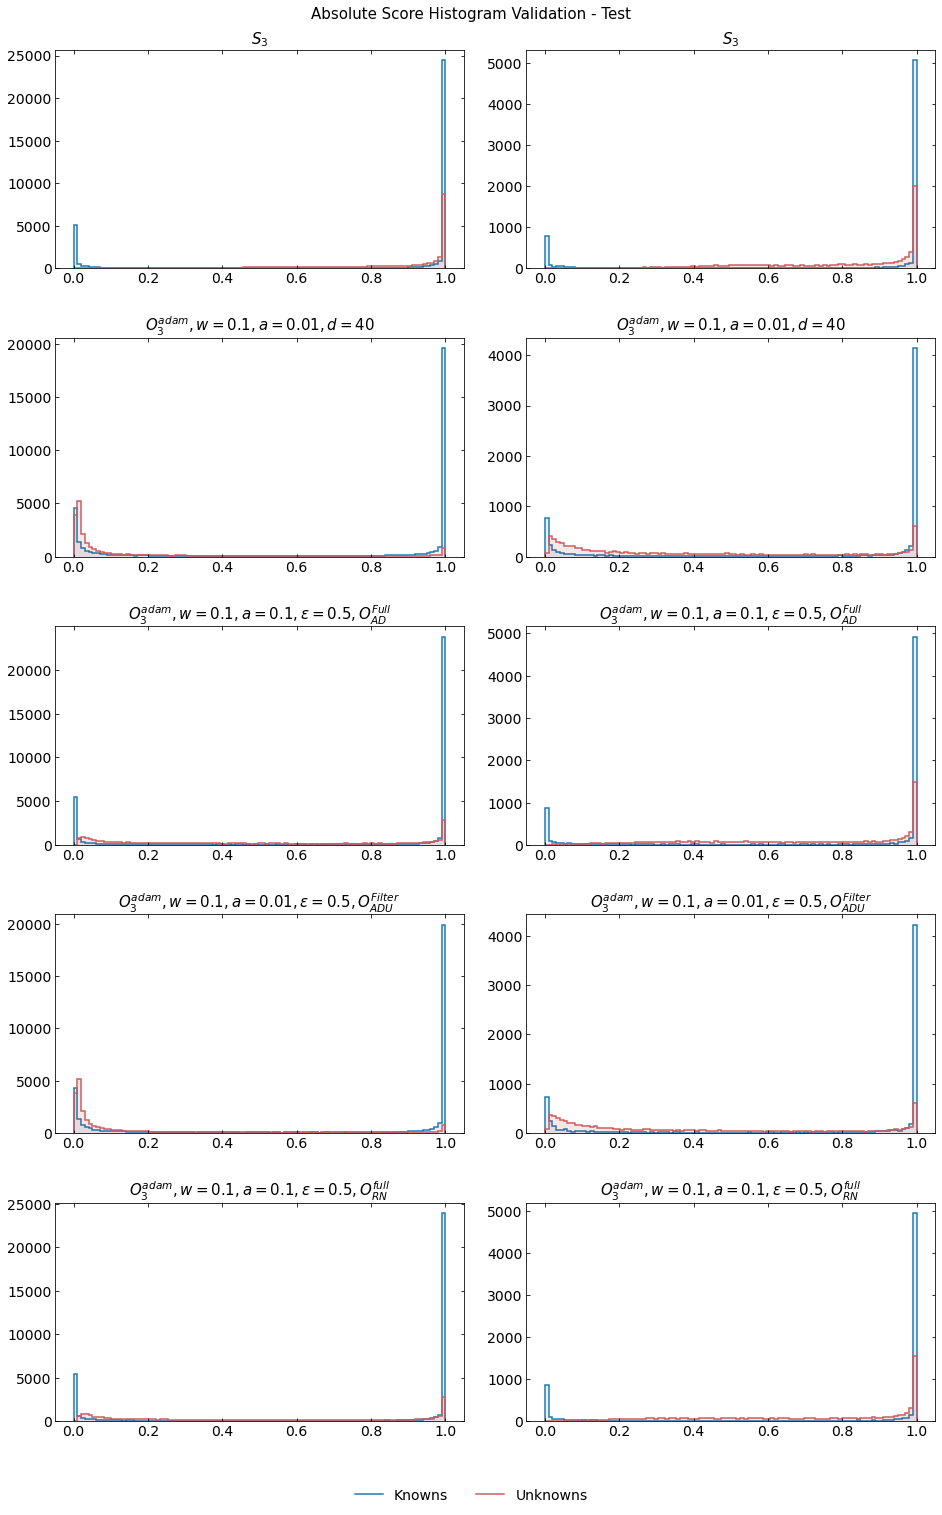

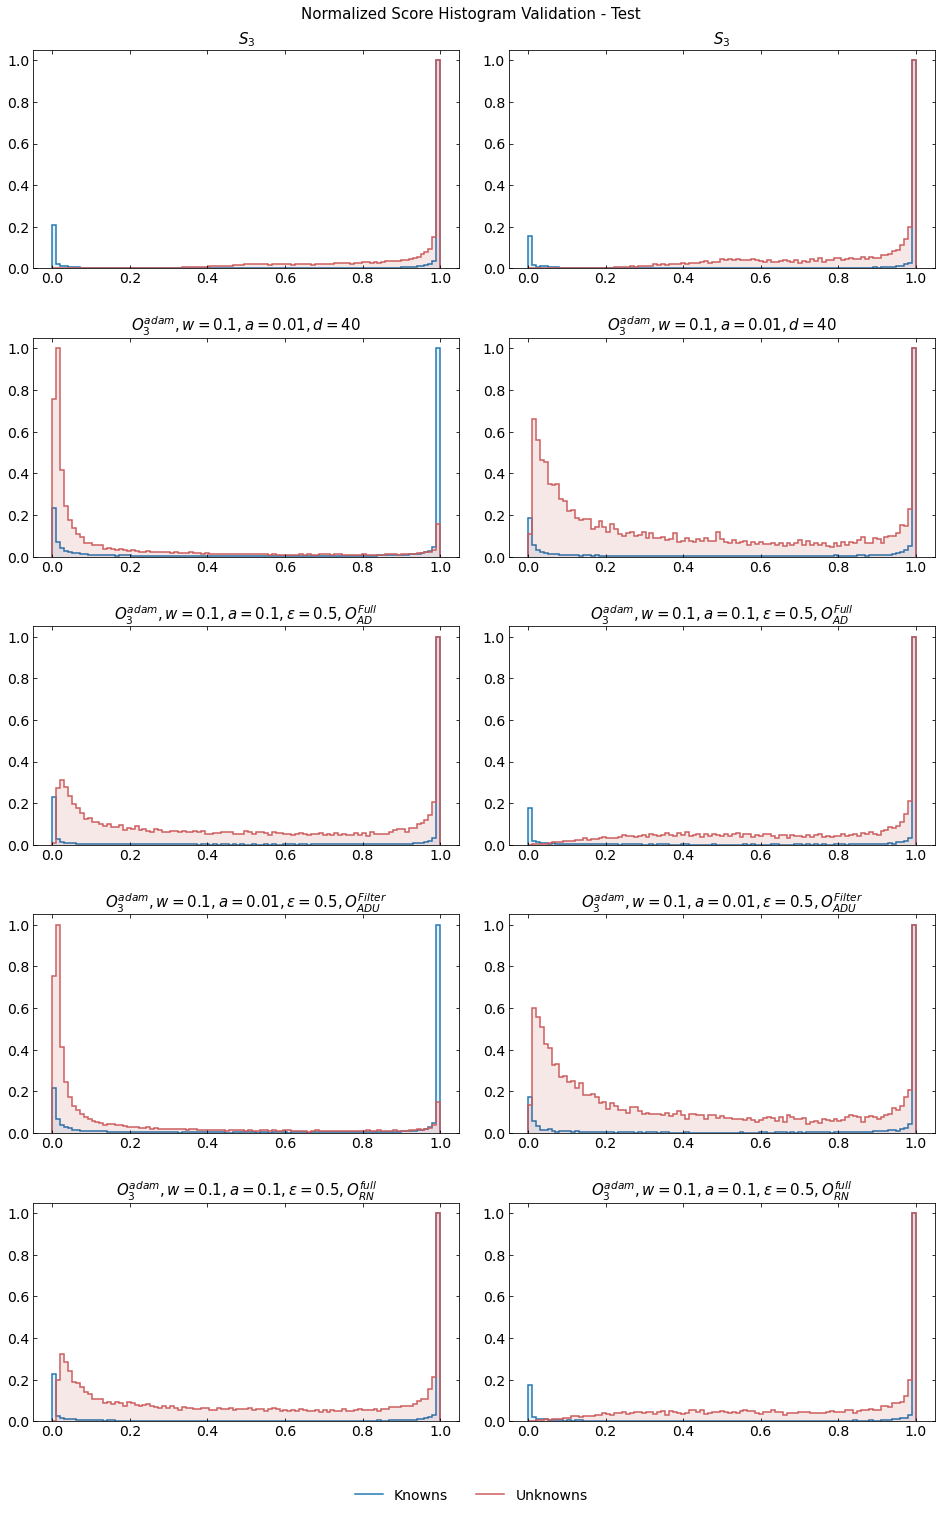

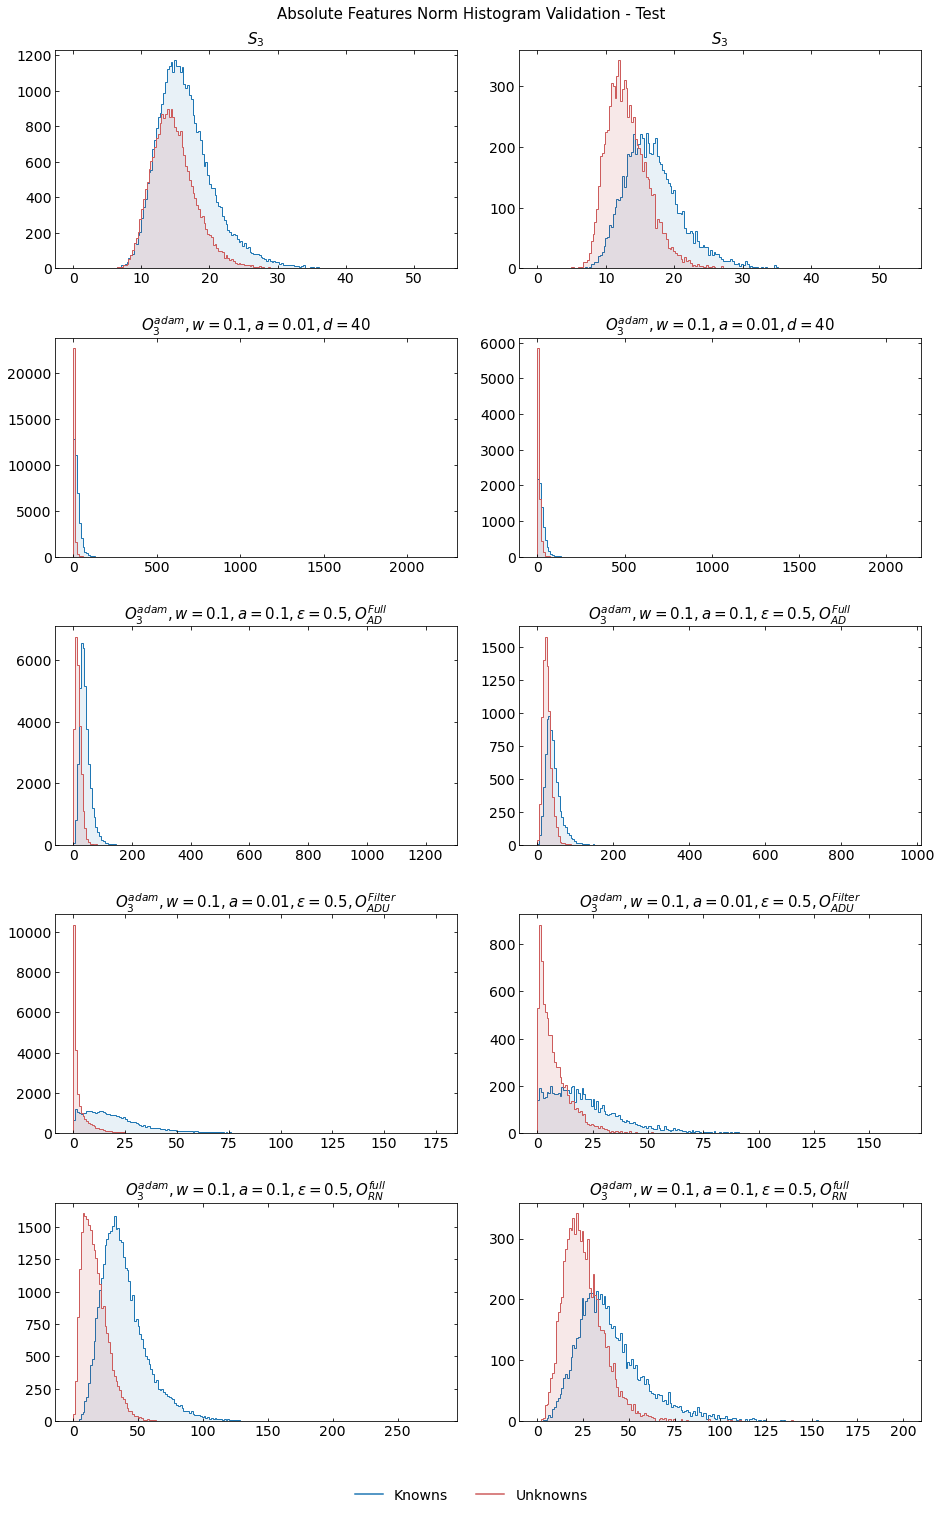

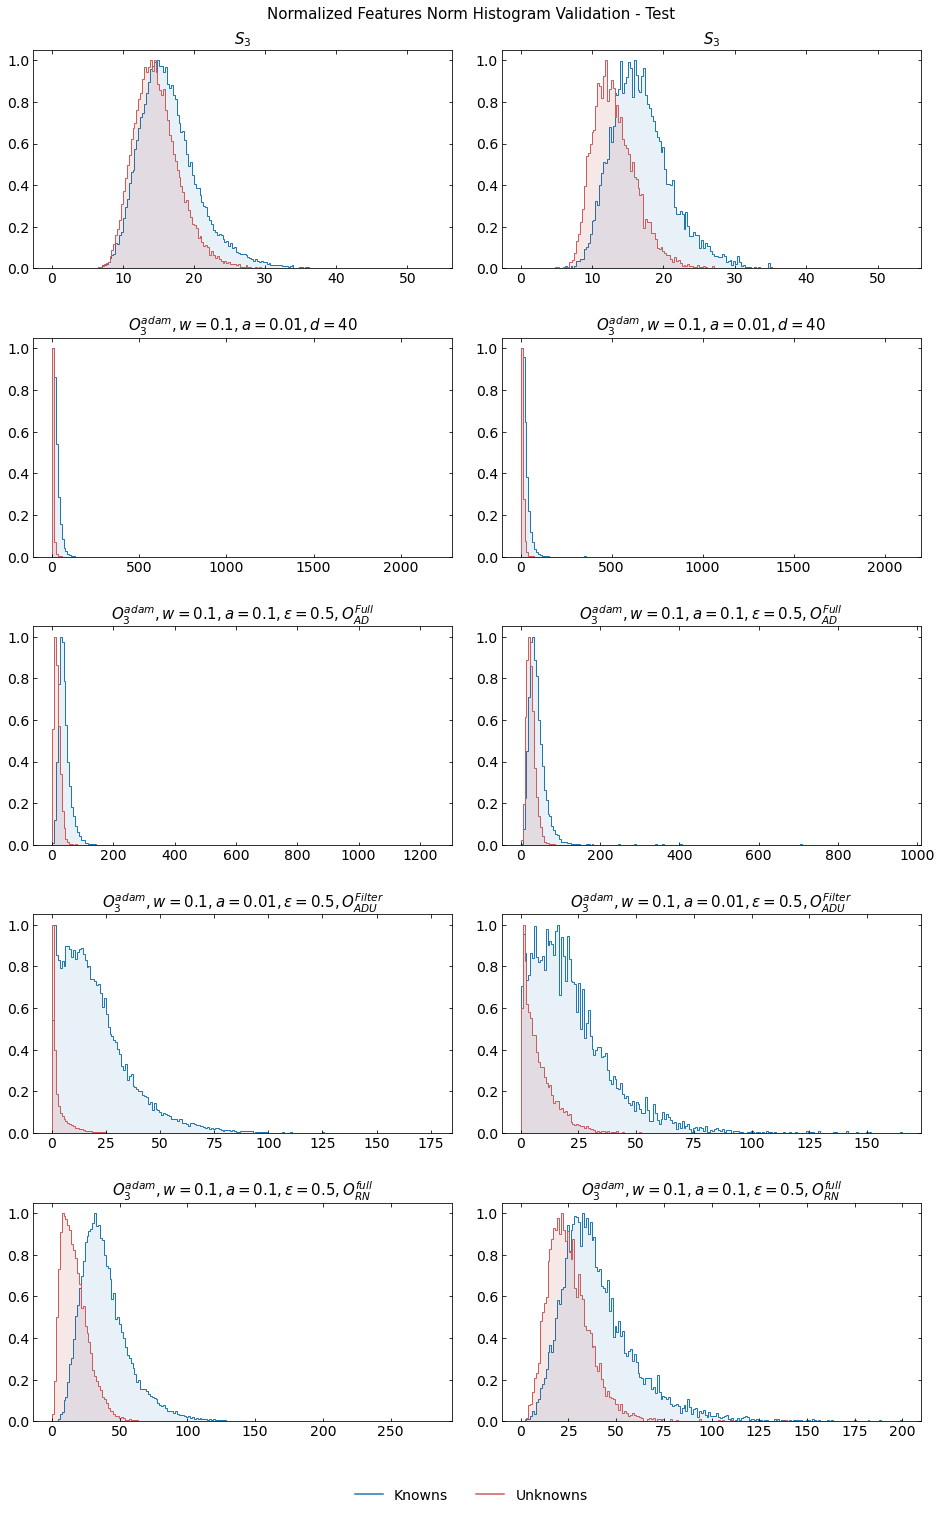

In [9]:
util.plot_histogram_val_test(arrays_curr, arrays_test_curr, metric='score', bins=100, figsize=(13,20), title='Absolute Score Histogram Validation - Test',
                             split='test', font=14, sharex=True, sharey=False, log=False, normalized=False, linewidth=1.5)
util.plot_histogram_val_test(arrays_curr, arrays_test_curr, metric='score', bins=100, figsize=(13,20), title='Normalized Score Histogram Validation - Test',
                             split='test', font=14, sharex=True, sharey=False, log=False, normalized=True, linewidth=1.5)
util.plot_histogram_val_test(arrays_curr, arrays_test_curr, metric='norm', bins=200, figsize=(13,20), title='Absolute Features Norm Histogram Validation - Test',
                             split='test', font=14, sharex=False, sharey=False, log=False, normalized=False, linewidth=1)
util.plot_histogram_val_test(arrays_curr, arrays_test_curr, metric='norm', bins=200, figsize=(13,20), title='Normalized Features Norm Histogram Validation - Test',
                             split='test', font=14, sharex=False, sharey=False, log=False, normalized=True, linewidth=1)